<a href="https://colab.research.google.com/github/alotfipoor/PythonProjects/blob/master/TIS_Index/TIS_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIS notebook

#Notebook settings and importing packages

In [31]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

Read data from file 'raw_v2.csv'
(in the same directory that your python process is based)

In [2]:
datatis = pd.read_csv("raw_v2.csv")

#Preview the first 10 lines of the loaded data

In [3]:
datatis.head(10)

,WI,DT,HC,RP,OS,Class
0,5,5.0,5,7,6,Drop in discharge
1,5,4.5,9,7,8,Drop in discharge
2,5,4.0,6,7,8,Drop in discharge
3,5,0.5,3,7,8,Not influenced
4,5,0.1,3,7,8,Not influenced
5,9,7.0,0,9,0,Not influenced
6,9,7.0,0,9,0,Not influenced
7,9,7.0,1,9,3,Drop in discharge
8,9,6.8,10,9,10,Completely dried up
9,9,6.8,10,9,10,Completely dried up


#Import train_test_split function

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = datatis[['WI','DT','HC','RP','OS']]
y = datatis['Class']  # Labels

#Split dataset into training set and test set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

## Random Forest Model

Train the model using the training sets and import confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, LeaveOneOut, GridSearchCV

# Create a Gaussian Classifier
forest_clf = RandomForestClassifier()

#Train the model using cross validation

In [18]:
# kfold

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(forest_clf, x_train, y_train, cv=kfold)

print('Cross-validated scores:', '\n', scores.mean())

y_pred_cross = cross_val_predict(forest_clf, x_train, y_train, cv=kfold)

Cross-validated scores: 
 0.8300000000000001


In [22]:
# Leave-one-out cross-validation

loo = LeaveOneOut()

scores = cross_val_score(forest_clf, x_train, y_train, cv=loo)

print('Cross-validated scores:', '\n', scores.mean())

y_pred_cross = cross_val_predict(forest_clf, x_train, y_train, cv=kfold)

Cross-validated scores: 
 0.8701298701298701


# Performance measures on training data

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
print("Accuracy:",accuracy_score(y_train, y_pred_cross))
print("Percision:",precision_score(y_train, y_pred_cross, average='micro'))
print("Recall:",recall_score(y_train, y_pred_cross, average='micro'))
print("F1 score:",f1_score(y_train, y_pred_cross, average='micro'))
print("confusion Matrix:","\n",confusion_matrix(y_train, y_pred_cross))

Accuracy: 0.8311688311688312
Percision: 0.8311688311688312
Recall: 0.8311688311688312
F1 score: 0.8311688311688312
confusion Matrix: 
 [[18  0  0  0]
 [ 1 13  2  0]
 [ 0  3  9  5]
 [ 0  0  2 24]]


# Grid Search

In [33]:
param_grid = [{'bootstrap': [False, True], 'n_estimators': [3, 5, 7], 'max_features': [2, 3, 4, 5]}]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5)

grid_search.fit(x_train,y_train)

y_pred = grid_search.predict(x_test)


print("Best parameters: ", format(grid_search.best_params_))
print("Best cross-validation score: ", format(grid_search.best_score_))
print("Test set score: ", format(grid_search.score(x_test, y_test)))
print("Best estimator:\n{}", format(grid_search.best_estimator_))

Best parameters:  {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
Best cross-validation score:  0.9090909090909091
Test set score:  0.8529411764705882
Best estimator:
{} RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Performance Measures on test data
Accuracy, Percision, Recall, F1 Score and Confusion Matrix

In [35]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Percision:",precision_score(y_test,y_pred, average='micro'))
print("Recall:",recall_score(y_test,y_pred, average='micro'))
print("F1 score:",f1_score(y_test,y_pred, average='micro'))
print("confusion Matrix:","\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.8529411764705882
Percision: 0.8529411764705882
Recall: 0.8529411764705882
F1 score: 0.8529411764705882
confusion Matrix: 
 [[11  0  0  0]
 [ 0  1  1  0]
 [ 0  0  7  1]
 [ 0  0  3 10]]


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

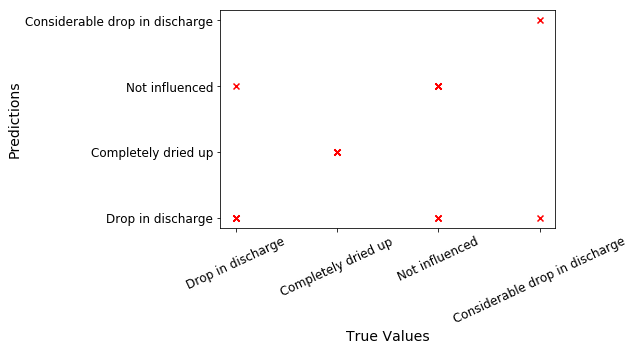

In [44]:
## The line / model
plt.scatter(y_test, y_pred, marker='x', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xticks(rotation=25)

# Plot confusion matrix

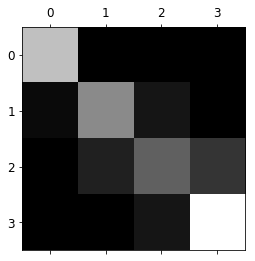

In [28]:
conf_mx_cross = confusion_matrix(y_train, y_pred_cross)

plt.matshow(conf_mx_cross, cmap=plt.cm.gray)
plt.show()